# Multivariate Linear Regression on DFT_SMC - Pure Non-Buchwald Ligand Data

- Dataset: DFT_SMC, 66 of the ligands
- x = Multivariates, Selected Features
- y = Yields from rxn II, Sam's paper

Data preparation

In [1]:
import numpy as np
import sklearn
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import AllChem, MolFromSmiles
from rdkit.Chem.SaltRemover import SaltRemover
from rdkit.Chem import DataStructs
from rdkit import Chem
from rxnfp.tokenization import get_default_tokenizer, SmilesTokenizer
from rdkit.Chem import rdChemReactions

In [2]:
# data
import pandas as pd
from rdkit import Chem
#from rxn_yields.data import generate_buchwald_hartwig_rxns
#df = pd.read_excel('../data/Buchwald-Hartwig/Dreher_and_Doyle_input_data.xlsx', sheet_name='FullCV_01')
df_origin = pd.read_excel('smc_data.xlsx', sheet_name='Pure_DFT_SMC')
df_origin = df_origin.sample(frac=1,random_state=42)
df_x = df_origin.drop(columns = ['SMILES','ID','ID.1','Unnamed: 0','y1','y2','y3','y4'])
df_x = df_x.drop(columns = ['y5','y6','y7','y8','y9','y10','y11','y12'])
df_x = df_x.drop(columns = ['y13','y14','y15','y16','y17','y18','y19','buch'])
df_x = df_x.drop(columns = ['x198','x199','x200','x201','x202','Unnamed: 110'])
df_y = df_origin[['x198']]

In [3]:
print('Shape of input:',df_x.shape,'\nShape of output:' ,df_y.shape)
df_x = df_x.astype(float)
df_y = df_y.astype(float)
df_x.to_excel("output.xlsx") 

Shape of input: (66, 199) 
Shape of output: (66, 1)


Permutation for 3 features

In [4]:
# permutations using library function !!not successful
from itertools import permutations 

perm = permutations(df_x.columns)
print(perm)

Visualization - three features

In [5]:
def plot_three_features(df_x,i,j,k):
    fig=plt.figure()
    ax=fig.add_subplot(111,projection='3d')
    n=100
    ax.scatter(df_x[i],df_x[j],df_x[k],color="red")
    ax.set_xlabel(i)
    ax.set_ylabel(j)
    ax.set_zlabel(k)
    print("A plot of axis:",i, j, ", and ",k)
    plt.show()

A plot of axis: x1 x2 , and  x3


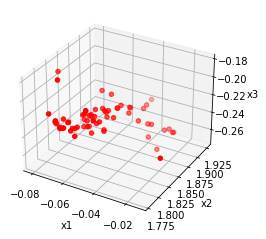

In [6]:
plot_three_features(df_x,'x1','x2','x3')

In [7]:
#This allows you to plot the 3d diagram of 2 features selected +1 feature from all features
for i in df_x.columns:
    #plot_three_features(df_x,i)
    continue

Splitting dataset

In [8]:
#Splitting dataset
train_x = df_x[:(int((len(df_x)*0.79)))]
train_y = df_y[:(int((len(df_x)*0.79)))]
test_x = df_x[(int((len(df_x)*0.79))):]
test_y = df_y[(int((len(df_x)*0.79))):]
print(train_x.shape)

(52, 199)


In [9]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
train_x1 = np.array(train_x[["x1"]])
train_x2 = np.array(train_x[["x2"]])
regr.fit(train_x,train_y)

LinearRegression()

# MLR - with all features

In [10]:
#Not using this package
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(df_x)

In [11]:
def linear_reg_of_n_features(df_x,df_y):
    reg=linear_model.LinearRegression()     #initiating linearregression
    model = reg.fit(df_x,df_y)
    Intercept=reg.intercept_
    Coefficients=reg.coef_
    return Intercept, Coefficients, model
    

In [12]:
Intercept, Coefficients, model = linear_reg_of_n_features(train_x,train_y)

In [13]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

reg_predictions = model.predict(train_x)
reg_mse = mean_squared_error(train_y, reg_predictions)
reg_rmse = np.sqrt(reg_mse)
print("Training set RMSE:",reg_rmse)

reg_predictions2 = model.predict(test_x)
reg_mse2 = mean_squared_error(test_y, reg_predictions2)
reg_rmse2 = np.sqrt(reg_mse2)
print("Test set RMSE:",reg_rmse2)

r2_score2=r2_score(train_y, reg_predictions)
print("Training set R^2:",r2_score2)
r2_score3=r2_score(test_y, reg_predictions2)
print("Test set R^2:",r2_score3)

Training set RMSE: 7.797962182586624e-13
Test set RMSE: 66.23479837696011
Training set R^2: 1.0
Test set R^2: -4.1409905124071225


In [14]:
print("Intercept:",Intercept,"Coefficient:",Coefficients)

Intercept: [454.37986736] Coefficient: [[-2.31824995e-02 -1.44375464e-01  4.48869699e-03 -2.68376826e-02
  -1.11744877e-02 -3.13263877e-02  1.22678347e-02 -6.64043141e-03
   5.12970185e-02  8.64988492e-02  2.68422688e-01 -3.15635137e-01
  -3.39033001e-02 -1.00598366e-01 -1.37719792e-01 -1.00805930e-01
  -4.15359646e-01  1.02605578e-01  1.12635055e-02 -7.19639524e-02
   6.65848909e-02  5.38430446e-03 -3.37724747e-02 -6.22648490e-01
  -1.34993599e+00  4.90337658e-02  3.15053601e-02  6.14261858e-02
   5.16352527e-02  5.12008233e-02  3.61923592e-02 -6.60117247e-03
  -1.20679744e-02 -4.29330828e-02 -3.11443997e-02 -4.26994053e+00
  -3.64729207e+00 -6.47349781e-03 -1.59544658e-02 -1.81923832e-01
  -1.20402151e-01 -9.70039442e-01 -5.57021402e-03 -2.47645450e-01
  -1.02128162e+00 -3.26907089e-01 -2.19745663e+00 -2.19027133e-01
   1.41703661e+00 -2.67553294e-02 -3.32985637e+00 -1.32539056e+00
  -1.55914017e+00 -2.33749617e-01  5.38300522e-01 -5.05013222e-01
   2.37863112e-02 -5.60691182e-02 -7.

# MLR - with 3 features

In [15]:
def linear_reg_of_3_features(df_x,df_y,i,j,k):
    df_3f = df_x[[i,j,k]]
    reg=linear_model.LinearRegression()     #initiating linearregression
    model = reg.fit(df_3f,df_y)
    Intercept=reg.intercept_
    Coefficients=reg.coef_
    return Intercept, Coefficients, model
    

In [16]:
def evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,i,j,k):
    reg_predictions = model.predict(train_x[[i,j,k]])
    train_mse = mean_squared_error(train_y, reg_predictions)
    train_rmse = "{:.2f}".format(np.sqrt(train_mse))

    reg_predictions2 = model.predict(test_x[[i,j,k]])
    test_mse = mean_squared_error(test_y, reg_predictions2)
    test_rmse = "{:.2f}".format(np.sqrt(test_mse))

    train_r2="{:.2f}".format(r2_score(train_y, reg_predictions))
    test_r2="{:.2f}".format(r2_score(test_y, reg_predictions2))
    return train_rmse, test_rmse, train_r2, test_r2

In [17]:
def evaluate_model_of_n_features(train_x,train_y,test_x,test_y,model):
    reg_predictions = model.predict(train_x)
    train_mse = mean_squared_error(train_y, reg_predictions)
    train_rmse = "{:.2f}".format(np.sqrt(train_mse))

    reg_predictions2 = model.predict(test_x)
    test_mse = mean_squared_error(test_y, reg_predictions2)
    test_rmse = "{:.2f}".format(np.sqrt(test_mse))

    train_r2="{:.2f}".format(r2_score(train_y, reg_predictions))
    test_r2="{:.2f}".format(r2_score(test_y, reg_predictions2))
    return train_rmse, test_rmse, train_r2, test_r2

In [18]:
#Combination of all columns from dataframe
def all_features(df):
    all_features = df.columns.values.tolist()
    return all_features

In [19]:
#This code actually generate a real combination of 3 features, but it just... contains too many for loops
all_feat = all_features(df_x)
def combination_any_3_features(all_feat):
    comb_3_feat = []
    for i in all_feat:
        for j in all_feat:
            for k in all_feat:
                if i!=j and j!=k and k!=i:
                    comb_3_feat.append([i,j,k])
        
    return comb_3_feat

In [20]:
def combination_any_2_features(all_feat,preset_feat):
    comb_2_feat = []
    for i in all_feat:
        for j in all_feat:
            if i!=j and i!=preset_feat and j!=preset_feat:
                comb_2_feat.append([preset_feat,i,j])
        
    return comb_2_feat

In [21]:
feats = combination_any_2_features(df_x,'x30')

In [22]:
all_feat.index('x1')

0

Do not re-do the feature combination generation because it cost time

In [23]:
#x1x2x3 x2x3x4 x3x4x5... a 'combination' that has 190~ elements so that I try things that aren't computational demanding
def fake_combination_any_3_features(df):
    comb_3_feat = []
    k="x1"
    for i in df.columns:
        while k != 'x197':
            j = df.columns[df.columns.get_loc(i)+1]
            k = df.columns[df.columns.get_loc(j)+1]
            if i !=j and j!=k and i!=k:
                print(i,j,k)
                comb_3_feat.append([i,j,k])
                i = df.columns[df.columns.get_loc(i)+1]
    return comb_3_feat

        

In [24]:
#df_x_set = combination_any_3_features(df_x)
#Run time: 24s

In [25]:
#Write down combination of any 3 features into a txt
#Txt already generated
"""
with open(r'all_features.txt', 'w') as fp:
    for item in df_x_set:
        # write each item on a new line
        fp.write("%s\n" % item)
    print('Done')
"""

'\nwith open(r\'all_features.txt\', \'w\') as fp:\n    for item in df_x_set:\n        # write each item on a new line\n        fp.write("%s\n" % item)\n    print(\'Done\')\n'

In [26]:
#Early attemps - trying to use mlr from math formular
"""
def hypothesis(theta, X):
    return theta*X
def computeCost(X, y, theta):
    y1 = hypothesis(theta, X)
    y1=np.sum(y1, axis=1)
    return sum(np.sqrt((y1-y)**2))/(2*47)
def gradientDescent(X, y, theta, alpha, i):
    J = []  #cost function in each iterations
    k = 0
    while k < i:        
        y1 = hypothesis(theta, X)
        y1 = np.sum(y1, axis=1)
        for c in range(0, len(X.columns)):
            print(theta[c])
            theta[c] = theta[c] - alpha*(((y1.sum()-y.sum())*X.iloc[:,c])/len(X))
        j = computeCost(X, y, theta)
        J.append(j)
        k += 1
    return J, j, theta
"""

'\ndef hypothesis(theta, X):\n    return theta*X\ndef computeCost(X, y, theta):\n    y1 = hypothesis(theta, X)\n    y1=np.sum(y1, axis=1)\n    return sum(np.sqrt((y1-y)**2))/(2*47)\ndef gradientDescent(X, y, theta, alpha, i):\n    J = []  #cost function in each iterations\n    k = 0\n    while k < i:        \n        y1 = hypothesis(theta, X)\n        y1 = np.sum(y1, axis=1)\n        for c in range(0, len(X.columns)):\n            print(theta[c])\n            theta[c] = theta[c] - alpha*(((y1.sum()-y.sum())*X.iloc[:,c])/len(X))\n        j = computeCost(X, y, theta)\n        J.append(j)\n        k += 1\n    return J, j, theta\n'

# Screening over 3 features - 1 fixed + combination with 2

Features Combination - feats, a list, len(list) lines, each line with n number of features

In [27]:
# 1 pre-determined feature + all combination of 2 features = 3 features total
# df_x and train_x are both okay here... because the columns are the same
feats = combination_any_2_features(df_x,'x30')

In [28]:
# Numbers of combinations (197*196)
len(feats)

39006

In [29]:
print('----------Linear regression of 3 features starts----------')
List_r2_4 = []
List_r2_3 = []
List_r2_2 = []
for m in feats:
    i = feats.index(m)
    Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
    #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
    train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
    #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
    if float(test_r2) >=0.4: 
        print('Significant!')
        print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
    elif float(test_r2) >=0.3:
        List_r2_3.append([feats[i][0],feats[i][1],feats[i][2]])
        

----------Linear regression of 3 features starts----------


KeyboardInterrupt: 

In [30]:
#To test with fake combination of 3 features
feats = fake_combination_any_3_features(df_x)

x1 x2 x3
x2 x3 x4
x3 x4 x5
x4 x5 x6
x5 x6 x7
x6 x7 x8
x7 x8 x9
x8 x9 x10
x9 x10 x11
x10 x11 x12
x11 x12 x13
x12 x13 x14
x13 x14 x15
x14 x15 x16
x15 x16 x17
x16 x17 x18
x17 x18 x19
x18 x19 x20
x19 x20 x21
x20 x21 x22
x21 x22 x23
x22 x23 x24
x23 x24 x25
x24 x25 x26
x25 x26 x27
x26 x27 x28
x27 x28 x29
x28 x29 x30
x29 x30 x31
x30 x31 x32
x31 x32 x33
x32 x33 x34
x33 x34 x35
x34 x35 x36
x35 x36 x37
x36 x37 x38
x37 x38 x39
x38 x39 x40
x39 x40 x41
x40 x41 x42
x41 x42 x43
x42 x43 x44
x43 x44 x45
x44 x45 x46
x45 x46 x47
x46 x47 x48
x47 x48 x49
x48 x49 x50
x49 x50 x51
x50 x51 x52
x51 x52 x53
x52 x53 x54
x53 x54 x55
x54 x55 x56
x55 x56 x57
x56 x57 x58
x57 x58 x59
x58 x59 x60
x59 x60 x61
x60 x61 x62
x61 x62 x63
x62 x63 x64
x63 x64 x65
x64 x65 x66
x65 x66 x67
x66 x67 x68
x67 x68 x69
x68 x69 x70
x69 x70 x71
x70 x71 x72
x71 x72 x73
x72 x73 x74
x73 x74 x75
x74 x75 x76
x75 x76 x77
x76 x77 x78
x77 x78 x79
x78 x79 x80
x79 x80 x81
x80 x81 x82
x81 x82 x83
x82 x83 x84
x83 x84 x85
x84 x85 ID.2
x85 ID.2 179.59

In [32]:
print('----------Linear regression of 3 features starts----------')
List_r2_4 = []
List_r2_3 = []
List_r2_2 = []
for m in feats:
    i = feats.index(m)
    Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
    #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
    train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
    #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
    if float(test_r2) >=0.4: 
        print('Significant!')
        print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
    elif float(test_r2) >=0.3:
        List_r2_3.append([feats[i][0],feats[i][1],feats[i][2]])

----------Linear regression of 3 features starts----------
Significant!
For features x178 x179 x180 : Intercept: [6.13011304] , Coefficient:  [[-19.39834291  24.96022414  21.2672572 ]]
Training rmse: 22.46 
Test rmse:  21.89 
Training r2: 0.11 
Test r2:  0.44


In [33]:
List_r2_3

[['x50', 'x51', 'x52'],
 ['x100', 'x101', 'x102'],
 ['x126', 'x127', 'x128'],
 ['x137', 'x138', 'x139']]

In [34]:
def combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y):
    print('----------Linear regression of 3 features starts----------')
    List_r2_4 = []
    List_r2_3 = []
    #List_r2_2 = []
    for m in feats:
        i = feats.index(m)
        Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
        #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
        #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
        if float(test_r2) >=0.4: 
            print('Significant!')
            print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
            print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
            List_r2_4.append([feats[i][0],feats[i][1],feats[i][2]])
        elif float(test_r2) >=0.3:
            List_r2_3.append([feats[i][0],feats[i][1],feats[i][2]])
    return List_r2_4,List_r2_3

Screening of some features that are significant from fake combination of 3 features

In [36]:
# Don't use df_x and df_y, they are not splitted. Use train_x and etc
feats = combination_any_2_features(df_x,'x51')
List_r2_4_x51,List_r2_3_x51 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)


----------Linear regression of 3 features starts----------
Significant!
For features x51 x8 x50 : Intercept: [169.51167448] , Coefficient:  [[  -5.79362172  206.74104607 -202.92903955]]
Training rmse: 19.88 
Test rmse:  22.46 
Training r2: 0.30 
Test r2:  0.41
Significant!
For features x51 x20 x112 : Intercept: [-123.02917069] , Coefficient:  [[  -6.86940853 -224.29485678   -3.7959301 ]]
Training rmse: 21.41 
Test rmse:  22.03 
Training r2: 0.19 
Test r2:  0.43
Significant!
For features x51 x21 x50 : Intercept: [203.07579353] , Coefficient:  [[  -7.36689969   97.61996376 -136.718299  ]]
Training rmse: 19.70 
Test rmse:  22.71 
Training r2: 0.32 
Test r2:  0.40
Significant!
For features x51 x32 x182 : Intercept: [-1523.43770929] , Coefficient:  [[ -8.32033535 743.10132779  18.15331228]]
Training rmse: 19.57 
Test rmse:  21.02 
Training r2: 0.32 
Test r2:  0.48
Significant!
For features x51 x33 x182 : Intercept: [-2137.72575924] , Coefficient:  [[  -7.72171816 1052.30502756   19.2643147 

In [58]:
len(List_r2_4_x51)

156

In [37]:
feats = combination_any_2_features(df_x,'x50')
List_r2_4_x50,List_r2_3_x50 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x50 x1 x56 : Intercept: [157.15096628] , Coefficient:  [[-167.89299028  -41.70350638   -1.48762785]]
Training rmse: 20.02 
Test rmse:  21.78 
Training r2: 0.29 
Test r2:  0.44
Significant!
For features x50 x1 x71 : Intercept: [174.08650336] , Coefficient:  [[-178.83757905   67.93489463    2.61878003]]
Training rmse: 19.54 
Test rmse:  21.02 
Training r2: 0.33 
Test r2:  0.48
Significant!
For features x50 x2 x56 : Intercept: [229.50204736] , Coefficient:  [[-168.43436187  -38.51675375   -1.39375072]]
Training rmse: 20.00 
Test rmse:  21.68 
Training r2: 0.29 
Test r2:  0.45
Significant!
For features x50 x2 x71 : Intercept: [159.45981749] , Coefficient:  [[-176.49032727    4.69128349    2.48607115]]
Training rmse: 19.55 
Test rmse:  21.02 
Training r2: 0.33 
Test r2:  0.48
Significant!
For features x50 x2 x76 : Intercept: [391.47224499] , Coefficient:  [[-123.83002167 -293.85356917  282.22616462]]
Traini

In [57]:
len(List_r2_4_x50)

2222

In [38]:
feats = combination_any_2_features(df_x,'x52')
List_r2_4_x52,List_r2_3_x52 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x52 x35 x172 : Intercept: [17.63467374] , Coefficient:  [[   -5.2744548 -1207.0398288     7.4240815]]
Training rmse: 20.17 
Test rmse:  22.26 
Training r2: 0.28 
Test r2:  0.42
Significant!
For features x52 x42 x49 : Intercept: [-12.27002405] , Coefficient:  [[-4.19051765 -0.34501273  0.44482362]]
Training rmse: 19.89 
Test rmse:  21.85 
Training r2: 0.30 
Test r2:  0.44
Significant!
For features x52 x43 x71 : Intercept: [62.1551743] , Coefficient:  [[  -0.92130062 -155.61481852    2.12548037]]
Training rmse: 20.42 
Test rmse:  22.57 
Training r2: 0.26 
Test r2:  0.40
Significant!
For features x52 x45 x71 : Intercept: [-20.35536366] , Coefficient:  [[-0.49288322 13.68450135  2.7321485 ]]
Training rmse: 20.71 
Test rmse:  21.65 
Training r2: 0.24 
Test r2:  0.45
Significant!
For features x52 x47 x71 : Intercept: [-42.0476419] , Coefficient:  [[0.15041962 2.20369535 2.22721797]]
Training rmse: 20.50 
Tes

In [42]:
List_r2_4_x52

[['x52', 'x35', 'x172'],
 ['x52', 'x42', 'x49'],
 ['x52', 'x43', 'x71'],
 ['x52', 'x45', 'x71'],
 ['x52', 'x47', 'x71'],
 ['x52', 'x49', 'x42'],
 ['x52', 'x49', 'x71'],
 ['x52', 'x50', 'x56'],
 ['x52', 'x50', 'x71'],
 ['x52', 'x56', 'x50'],
 ['x52', 'x71', 'x43'],
 ['x52', 'x71', 'x45'],
 ['x52', 'x71', 'x47'],
 ['x52', 'x71', 'x49'],
 ['x52', 'x71', 'x50'],
 ['x52', 'x71', 'x172'],
 ['x52', 'x172', 'x35'],
 ['x52', 'x172', 'x71'],
 ['x52', 'x177', 'x180'],
 ['x52', 'x180', 'x177']]

In [39]:
feats = combination_any_2_features(df_x,'x180')
List_r2_4_x180,List_r2_3_x180 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x180 x1 x177 : Intercept: [6.18356241] , Coefficient:  [[  24.17485599 -320.38453431  -25.91978832]]
Training rmse: 22.19 
Test rmse:  20.76 
Training r2: 0.13 
Test r2:  0.49
Significant!
For features x180 x2 x76 : Intercept: [162.57993336] , Coefficient:  [[  14.19638901 -346.72206178  473.37217648]]
Training rmse: 19.95 
Test rmse:  22.31 
Training r2: 0.30 
Test r2:  0.42
Significant!
For features x180 x2 x77 : Intercept: [371.25101822] , Coefficient:  [[   9.3191343  -404.80420152  394.25524969]]
Training rmse: 20.41 
Test rmse:  22.30 
Training r2: 0.27 
Test r2:  0.42
Significant!
For features x180 x2 x80 : Intercept: [311.85528072] , Coefficient:  [[   8.96081727 -361.76568831  369.86730194]]
Training rmse: 21.36 
Test rmse:  22.70 
Training r2: 0.20 
Test r2:  0.40
Significant!
For features x180 x2 x92 : Intercept: [415.57351579] , Coefficient:  [[  13.58939175 -192.28141952   -8.90109525]]
Tr

In [43]:
List_r2_4_x180

[['x180', 'x1', 'x177'],
 ['x180', 'x2', 'x76'],
 ['x180', 'x2', 'x77'],
 ['x180', 'x2', 'x80'],
 ['x180', 'x2', 'x92'],
 ['x180', 'x2', 'x95'],
 ['x180', 'x2', 'x142'],
 ['x180', 'x2', 'x145'],
 ['x180', 'x2', 'x177'],
 ['x180', 'x3', 'x177'],
 ['x180', 'x4', 'x177'],
 ['x180', 'x5', 'x177'],
 ['x180', 'x6', 'x177'],
 ['x180', 'x7', 'x177'],
 ['x180', 'x8', 'x177'],
 ['x180', 'x10', 'x177'],
 ['x180', 'x11', 'x177'],
 ['x180', 'x12', 'x177'],
 ['x180', 'x15', 'x177'],
 ['x180', 'x16', 'x177'],
 ['x180', 'x17', 'x177'],
 ['x180', 'x18', 'x177'],
 ['x180', 'x19', 'x177'],
 ['x180', 'x20', 'x177'],
 ['x180', 'x21', 'x34'],
 ['x180', 'x21', 'x35'],
 ['x180', 'x21', 'x177'],
 ['x180', 'x22', 'x177'],
 ['x180', 'x23', 'x142'],
 ['x180', 'x23', 'x145'],
 ['x180', 'x23', 'x177'],
 ['x180', 'x25', 'x177'],
 ['x180', 'x26', 'x177'],
 ['x180', 'x27', 'x177'],
 ['x180', 'x28', 'x142'],
 ['x180', 'x28', 'x145'],
 ['x180', 'x28', 'x177'],
 ['x180', 'x29', 'x142'],
 ['x180', 'x29', 'x145'],
 ['x180'

In [62]:
feats = combination_any_2_features(df_x,'x177')
List_r2_4_x177,List_r2_3_x177 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x177 x1 x162 : Intercept: [24.08495201] , Coefficient:  [[ -33.84096475 -548.50382823   24.08188538]]
Training rmse: 21.20 
Test rmse:  22.68 
Training r2: 0.21 
Test r2:  0.40
Significant!
For features x177 x1 x165 : Intercept: [3.09700421] , Coefficient:  [[ -27.70040925 -470.96557422   22.69248532]]
Training rmse: 20.45 
Test rmse:  21.95 
Training r2: 0.26 
Test r2:  0.44
Significant!
For features x177 x1 x180 : Intercept: [6.18356241] , Coefficient:  [[ -25.91978832 -320.38453431   24.17485599]]
Training rmse: 22.19 
Test rmse:  20.76 
Training r2: 0.13 
Test r2:  0.49
Significant!
For features x177 x2 x161 : Intercept: [193.52793448] , Coefficient:  [[ -12.32268985 -101.52485528   13.55029302]]
Training rmse: 21.85 
Test rmse:  22.70 
Training r2: 0.16 
Test r2:  0.40
Significant!
For features x177 x2 x162 : Intercept: [321.86609051] , Coefficient:  [[ -30.53756887 -152.13349388   23.35529527]]
T

KeyboardInterrupt: 

In [ ]:
len(List_r2_4_x177)

NameError: name 'List_r2_4_x177' is not defined

In [48]:
feats = combination_any_2_features(df_x,'x101')
List_r2_4_x101,List_r2_3_x101 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x101 x21 x71 : Intercept: [117.69364467] , Coefficient:  [[  0.23772063 153.61086172   1.23173696]]
Training rmse: 21.93 
Test rmse:  22.58 
Training r2: 0.15 
Test r2:  0.40
Significant!
For features x101 x42 x49 : Intercept: [-12.03530984] , Coefficient:  [[-0.1679754  -0.3301175   0.44132421]]
Training rmse: 19.84 
Test rmse:  22.41 
Training r2: 0.31 
Test r2:  0.41
Significant!
For features x101 x45 x56 : Intercept: [-23.32444078] , Coefficient:  [[-0.29208995 18.35267154 -1.89837999]]
Training rmse: 20.68 
Test rmse:  22.43 
Training r2: 0.25 
Test r2:  0.41
Significant!
For features x101 x45 x71 : Intercept: [-26.04057674] , Coefficient:  [[-0.2869657  19.38584369  3.00920975]]
Training rmse: 20.10 
Test rmse:  21.41 
Training r2: 0.29 
Test r2:  0.46
Significant!
For features x101 x47 x71 : Intercept: [-54.10967951] , Coefficient:  [[-0.27769936  3.04702815  2.19191651]]
Training rmse: 19.90 
T

In [54]:
len(List_r2_4_x101)

26

In [49]:
feats = combination_any_2_features(df_x,'x127')
List_r2_4_x127,List_r2_3_x127 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x127 x1 x182 : Intercept: [-31.12147016] , Coefficient:  [[  -4.88055923 -582.61462231   16.02079185]]
Training rmse: 18.54 
Test rmse:  22.02 
Training r2: 0.39 
Test r2:  0.43
Significant!
For features x127 x1 x185 : Intercept: [-28.3809899] , Coefficient:  [[  -3.90844896 -616.18816932   12.33835103]]
Training rmse: 19.86 
Test rmse:  22.51 
Training r2: 0.30 
Test r2:  0.41
Significant!
For features x127 x2 x20 : Intercept: [341.5963833] , Coefficient:  [[  -3.76362739 -227.84269412 -206.30954185]]
Training rmse: 21.53 
Test rmse:  21.99 
Training r2: 0.18 
Test r2:  0.43
Significant!
For features x127 x2 x43 : Intercept: [566.25586249] , Coefficient:  [[  -2.96992498 -259.2162125  -146.13533435]]
Training rmse: 20.25 
Test rmse:  22.67 
Training r2: 0.28 
Test r2:  0.40
Significant!
For features x127 x2 x45 : Intercept: [574.71600654] , Coefficient:  [[  -2.70682964 -307.23100714   11.77597546]]
T

In [53]:
len(List_r2_4_x127)

292

In [50]:
feats = combination_any_2_features(df_x,'x138')
List_r2_4_x138,List_r2_3_x138 = combination_of_features_doing_MLR(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------
Significant!
For features x138 x7 x50 : Intercept: [232.48914899] , Coefficient:  [[-5.59983966e-02 -5.76803729e+02 -2.41085992e+02]]
Training rmse: 19.94 
Test rmse:  22.54 
Training r2: 0.30 
Test r2:  0.40
Significant!
For features x138 x8 x50 : Intercept: [213.47958016] , Coefficient:  [[-4.34584354e-02  3.49130288e+02 -2.79752381e+02]]
Training rmse: 20.25 
Test rmse:  22.60 
Training r2: 0.28 
Test r2:  0.40
Significant!
For features x138 x35 x172 : Intercept: [9.1300855] , Coefficient:  [[-6.95181237e-02 -1.57037446e+03  1.08253467e+01]]
Training rmse: 19.99 
Test rmse:  21.80 
Training r2: 0.30 
Test r2:  0.44
Significant!
For features x138 x42 x49 : Intercept: [-16.97481116] , Coefficient:  [[ 0.0021828  -0.34743441  0.44456238]]
Training rmse: 20.07 
Test rmse:  22.24 
Training r2: 0.29 
Test r2:  0.42
Significant!
For features x138 x43 x71 : Intercept: [61.34664129] , Coefficient:  [[-4.16557453e-04 -1.55171929e+02  

In [52]:
len(List_r2_4_x138)

40

In [63]:
def combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y):
    print('----------Linear regression of 3 features starts----------')
    List_r2_7 = []
    List_r2_6 = []
    List_r2_5 = []
    for m in feats:
        i = feats.index(m)
        Intercept, Coefficient, model = linear_reg_of_3_features(train_x,train_y,feats[i][0],feats[i][1],feats[i][2])
        #print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
        train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_3_features(train_x,train_y,test_x,test_y,model,feats[i][0],feats[i][1],feats[i][2])
        #print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
        if float(test_r2) >=0.7: 
            print('Significant!')
            print('For features',feats[i][0],feats[i][1],feats[i][2],': Intercept:',Intercept,', Coefficient: ',Coefficient)
            print('Training rmse:',train_rmse, '\nTest rmse: ',test_rmse, '\nTraining r2:',train_r2, '\nTest r2: ',test_r2 )
            List_r2_7.append([feats[i][0],feats[i][1],feats[i][2]])
        elif float(test_r2) >=0.6:
            List_r2_6.append([feats[i][0],feats[i][1],feats[i][2]])
        elif float(test_r2) >=0.5:
            List_r2_5.append([feats[i][0],feats[i][1],feats[i][2]])
    return List_r2_7,List_r2_6, List_r2_5

In [64]:
feats = combination_any_2_features(df_x,'x50')
List_r2_7_x50,List_r2_6_x50, List_r2_5_x50= combination_of_features_doing_MLR_7(feats,train_x,train_y,test_x,test_y)

----------Linear regression of 3 features starts----------


In [68]:
len(List_r2_5_x50)

216

# Evaluation and Cross validation with any selection of features

In [46]:
from sklearn.model_selection import cross_val_score


In [45]:
# This program auto - split the data, so safe to use df_x and df_y as input. 
# Make sure to cut df_x beforehand into a df with chosen amount of features.
def fold_5_cross_validation(df_x,df_y):
    train_x = df_x[:(int((len(df_x)*0.79)))]
    train_y = df_y[:(int((len(df_x)*0.79)))]
    test_x = df_x[(int((len(df_x)*0.79))):]
    test_y = df_y[(int((len(df_x)*0.79))):]
    Intercept, Coefficients, regg = linear_reg_of_n_features(train_x,train_y)
    print('Intercept:',Intercept,', Coefficient: ',Coefficients)
    train_rmse, test_rmse, train_r2,test_r2 = evaluate_model_of_n_features(train_x,train_y,test_x,test_y,regg)
    print('Training set RMSE:',train_rmse, '\nTest set RMSE: ',test_rmse, '\nTraining set R^2:',train_r2, '\nTest set R^2: ',test_r2 )
    cvd_scores = cross_val_score(regg, df_x, df_y, cv=5)
    print('5 fold Cross Validation score: ',cvd_scores)

In [67]:
df_3f = df_x[['x50', 'x56', 'x103']]
fold_5_cross_validation(df_3f,df_y)

Intercept: [267.95893894] , Coefficient:  [[-271.86256028   -1.62593729   -0.42190762]]
Training set RMSE: 18.73 
Test set RMSE:  20.45 
Training set R^2: 0.38 
Test set R^2:  0.51
5 fold Cross Validation score:  [-0.07903686  0.04314171 -0.03952122  0.35479076  0.4947575 ]


A plot of axis: x50 x127 , and  x180


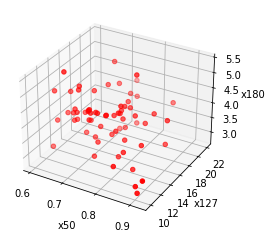

In [61]:
plot_three_features(df_x,'x50','x127','x180')

In [ ]:
df_4f = df_x[['x30','x180','x177','x172']]
fold_5_cross_validation(df_4f,df_y)

Intercept: [-42.41749792] , Coefficient:  [[352.03015914   5.85056528 -20.30423503   6.08844314]]
Training set RMSE: 20.45 
Test set RMSE:  20.84 
Training set R^2: 0.26 
Test set R^2:  0.49
5 fold Cross Validation score:  [-0.92705687 -0.37413598  0.20698457  0.45437084  0.47875789]


Best combination of features in Sigman's code: x180, x24, x25, x29, x40, x57, x70

In [ ]:
df_7f = df_x[['x24','x180','x25','x29','x40','x57','x70']]
fold_5_cross_validation(df_7f,df_y)

Intercept: [-208.62656284] , Coefficient:  [[ -2.85628735   1.73101881   3.33532979 -90.12283802 -67.55719284
   -0.50437882  -2.11537546]]
Training set RMSE: 20.31 
Test set RMSE:  30.29 
Training set R^2: 0.27 
Test set R^2:  -0.07
5 fold Cross Validation score:  [-3.84758222 -0.31700898  0.05667174 -0.02381334  0.12173476]


# Summary

x30, x177 and x180 are more significant than other features.
x172 also improves the result